# 淘宝用户行为分析

## 项目描述
用户研究是产品设计的第一步，其中以大量数据为支撑的用户行为分析尤为重要，这个项目我们采用淘宝“百万级”用户数据，深度分析用户行为，主要包含基本用户购物情况数据统计，复购率分析，用户留存分析，获客分析，从时间维度分析每天，每周用户活跃度。用
户行为漏斗图与各环节转换率分析，指导运营人员及时调整运营策略。

 2014年是阿里巴巴集团移动电子商务业务快速发展的一年。例如，2014年11月11日的移动销售中的移动终端商品总销售额（GMV）占总GMV的42.6％。与PC时代相比，移动终端可以随时随地访问网络。此外，他们还拥有更丰富的背景数据，例如用户的位置信息，访问时间的规律性等。该数据基于阿里巴巴M-Commerce平台上的真实用户商品行为数据。同时，它提供了移动时代典型的位置信息。


## 项目步骤
### 主要完成目标如下：<br>
1. 读取数据，数据抽样<br>
2. 数据的描述性分析<br>
3. 数据的一致性处理<br>
4. 探索性分析：统计浏览量，独立访客数，分析有购买行为的用户数，复购率分析<br>
   (1)统计pv：Page View, 即页面浏览量或点击量<br>
   (2)UV（用户总数）：9924 UV(独立访客)：即Unique Visitor,访问网站的一台电脑客户端为一个访客。00:00-24:00内相同的客户端只被计算一次<br>
5. 探索性分析：从时间维度分析用户行为<br>
   (1)每周的用户行为数量变化趋势<br>
   (2)每天PV变化趋势分析<br>
   (3)分析一天中的不同时段用户的行为<br>
6. 浏览量top10的产品<br>
7. 转化率分析<br>
   (1)单一环节转化率<br>
   (2)总体转化率<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 读取数据，这里是完整的12256906条数据

数据集来源：https://tianchi.aliyun.com/dataset/dataDetail?dataId=46

In [2]:
# import pandas as pd
# data=pd.read_csv('tianchi_mobile_recommend_train_user.csv')
# data.head()
# data.info()  

### 数据量过大，所以这里随机抽取了100万条数据，并且存储为user.csv

In [3]:
#随机、可放回抽样
# data=data.sample(n=1000000,replace=True,axis=0) 
# data.to_csv("user.csv")

In [4]:
# 存储的user.csv文件
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
data=pd.read_csv('user.csv')

In [5]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,30282407,189836232,1,NaN,6431,2014-12-15 14
1,91557809,43134506,1,NaN,1863,2014-12-10 18
2,21233965,3776579,3,94rlqle,13664,2014-12-02 20
3,54590569,107237828,1,NaN,1863,2014-12-02 03
4,137120980,54431185,1,94jrwhn,5395,2014-12-09 17


### 数据描述性分析

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   user_id        1000000 non-null  int64 
 1   item_id        1000000 non-null  int64 
 2   behavior_type  1000000 non-null  int64 
 3   user_geohash   320202 non-null   object
 4   item_category  1000000 non-null  int64 
 5   time           1000000 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.8+ MB


user_id：用户ID<br>
item_id：商品ID<br>
behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）<br>
user_geohash：地理位置:这里进行了加密处理<br>
item_category：品类ID（商品所属的品类）<br>
time：用户行为发生的时间<br>

### 数据缺失值处理

user_geohash地理位置列，多数为NULL，且信息被加密处理，这里不做地理位置的研究。

In [7]:
data.drop(['user_geohash'],axis=1,inplace=True)#这里user_geohash大量缺失不好填充，所以选择删除user_geohash这一特征

### 数据一致性处理

In [8]:
#把time给拆开
import re
#拆分数据集
data['date'] = data['time'].map(lambda s: re.compile(' ').split(s)[0])
data['hour']=data['time'].map(lambda s:re.compile(' ').split(s)[1])
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,1,6431,2014-12-15 14,2014-12-15,14
1,91557809,43134506,1,1863,2014-12-10 18,2014-12-10,18
2,21233965,3776579,3,13664,2014-12-02 20,2014-12-02,20
3,54590569,107237828,1,1863,2014-12-02 03,2014-12-02,03
4,137120980,54431185,1,5395,2014-12-09 17,2014-12-09,17


In [9]:
#​将行为类型的代表数值用字符表示
di = {1:'pv',2: 'collect',3:'cart',4:'buy'}
data['behavior_type']= data['behavior_type'].apply(lambda x: di[x])

In [10]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,pv,6431,2014-12-15 14,2014-12-15,14
1,91557809,43134506,pv,1863,2014-12-10 18,2014-12-10,18
2,21233965,3776579,cart,13664,2014-12-02 20,2014-12-02,20
3,54590569,107237828,pv,1863,2014-12-02 03,2014-12-02,03
4,137120980,54431185,pv,5395,2014-12-09 17,2014-12-09,17


In [11]:
data.dtypes

user_id           int64
item_id           int64
behavior_type    object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [12]:
#time列和date列应该转化为日期类数据类型，hour列应该是int数据类型。
#数据类型转化
data['date']=pd.to_datetime(data['date'])
data['time']=pd.to_datetime(data['time'])
data['hour']=data['hour'].astype('int64')

In [13]:
data.dtypes

user_id                   int64
item_id                   int64
behavior_type            object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

### 用户行为分析：基本用户购物情况数据统计

（1）pv：Page View, 即页面浏览量或点击量，用户每次刷新即被计算一次。这组数据中pv数为942150<br>

In [14]:
data['behavior_type'].value_counts()

pv         942150
cart        28242
collect     19837
buy          9771
Name: behavior_type, dtype: int64

In [15]:
data.groupby(['behavior_type'])['user_id'].count()

behavior_type
buy          9771
cart        28242
collect     19837
pv         942150
Name: user_id, dtype: int64

In [16]:
data['user_id'].value_counts()

36233277     2611
65645933     1717
59511789     1652
73196588     1652
130270245    1580
             ... 
50157359        1
88574383        1
10557490        1
97821126        1
88660059        1
Name: user_id, Length: 9924, dtype: int64

这里可以看出数据中有重复出现的顾客，所以我们来看一下独立访客也就是UV,这里显示Length为9924，独立存在的用户

（2）UV（用户总数）：9924 UV(独立访客)：即Unique Visitor,访问网站的一台电脑客户端为一个访客。00:00-24:00内相同的客户端只被计算一次。

In [17]:
# drop_duplicates是pandas中的去重方法
data.drop_duplicates('user_id').count()

user_id          9924
item_id          9924
behavior_type    9924
item_category    9924
time             9924
date             9924
hour             9924
dtype: int64

In [18]:
data.user_id.nunique()

9924

（3）分析有购买行为的用户数：4522

In [19]:
data_buy=data[data['behavior_type']=='buy']
data_buy.head()
data_buy.drop_duplicates('user_id')['behavior_type'].count()

4522

### 用户行为分析：从时间维度分析

（1）每周的用户行为数量变化趋势

In [20]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,30282407,189836232,pv,6431,2014-12-15 14:00:00,2014-12-15,14
1,91557809,43134506,pv,1863,2014-12-10 18:00:00,2014-12-10,18
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20
3,54590569,107237828,pv,1863,2014-12-02 03:00:00,2014-12-02,3
4,137120980,54431185,pv,5395,2014-12-09 17:00:00,2014-12-09,17


In [21]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
import numpy as np
data['week']=[i.weekday() for i in data['time']]
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour,week
0,30282407,189836232,pv,6431,2014-12-15 14:00:00,2014-12-15,14,0
1,91557809,43134506,pv,1863,2014-12-10 18:00:00,2014-12-10,18,2
2,21233965,3776579,cart,13664,2014-12-02 20:00:00,2014-12-02,20,1
3,54590569,107237828,pv,1863,2014-12-02 03:00:00,2014-12-02,3,1
4,137120980,54431185,pv,5395,2014-12-09 17:00:00,2014-12-09,17,1


In [22]:
df_week=data.groupby('week')['user_id'].count()
df_week
df_week.index=[1,2,3,4,5,6,7]
df_week

1    126743
2    157728
3    158390
4    162079
5    140821
6    124427
7    129812
Name: user_id, dtype: int64

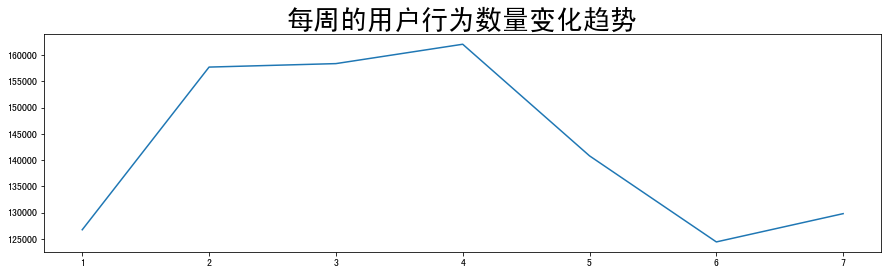

In [23]:
fig=plt.figure(figsize=(15,4))
plt.title('每周的用户行为数量变化趋势',fontsize='27')
plt.xticks(df_week.index)
plt.plot(df_week.index,df_week)

从这里可以看到，周一到周二的用户行为逐渐增加，周二-周四达到一个稳定值，周四到-周六用户行为明显减少，周六为一周最低，周六后开始逐渐增加。

（2）每天PV变化趋势分析

In [24]:
data1=data[data['behavior_type']=='pv']
day_pv=data1.groupby(['date'])['user_id'].count()
day_pv

date
2014-11-18    28260
2014-11-19    27541
2014-11-20    26881
2014-11-21    25736
2014-11-22    27960
2014-11-23    29554
2014-11-24    29057
2014-11-25    28417
2014-11-26    27793
2014-11-27    28526
2014-11-28    26133
2014-11-29    28047
2014-11-30    31133
2014-12-01    30271
2014-12-02    31066
2014-12-03    31889
2014-12-04    30580
2014-12-05    28036
2014-12-06    29568
2014-12-07    30551
2014-12-08    29570
2014-12-09    30424
2014-12-10    32737
2014-12-11    37769
2014-12-12    51986
2014-12-13    31894
2014-12-14    31225
2014-12-15    30541
2014-12-16    30581
2014-12-17    29483
2014-12-18    28941
Name: user_id, dtype: int64

In [25]:
# plt.plot(day_pv.index,day_pv)

In [26]:
pd.date_range(day_pv.index[0],day_pv.index[-1],freq='D')

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', freq='D')

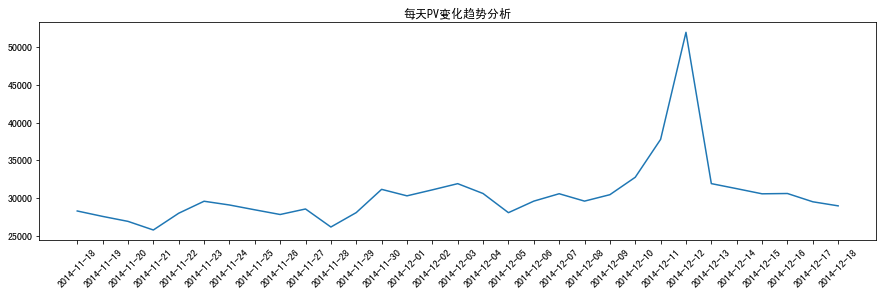

In [27]:
import matplotlib.dates as mdate
fig=plt.figure(figsize=(15,4))
plt.title('每天PV变化趋势分析')
ax=fig.add_subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(day_pv.index[0],day_pv.index[-1],freq='D'),rotation=45)
ax.plot(day_pv.index,day_pv)

从这个图可以看出，在12月份开始，用户行为逐渐有增多趋势，尤其在12月9日开始，用户行为明显高于其他时期，这几天用户行为增多是因为淘宝的“双十二”活动。

用户总数变化趋势与PV量变化趋势类似，在双十二期间，用户总数明显上升，活动过后，人数明显下降至平稳状态。

（3）分析一天中的不同时段用户的行为

In [28]:
lista=['hour','user_id']
data_hour= data[lista]
data_hour.head()
df=data_hour.groupby('hour')['user_id'].count()
df

hour
0     42660
1     21916
2     11981
3      8086
4      6553
5      7242
6     12918
7     23508
8     32250
9     39646
10    45033
11    42578
12    43268
13    49048
14    48543
15    48957
16    46674
17    41353
18    44623
19    59674
20    76323
21    89275
22    89093
23    68798
Name: user_id, dtype: int64

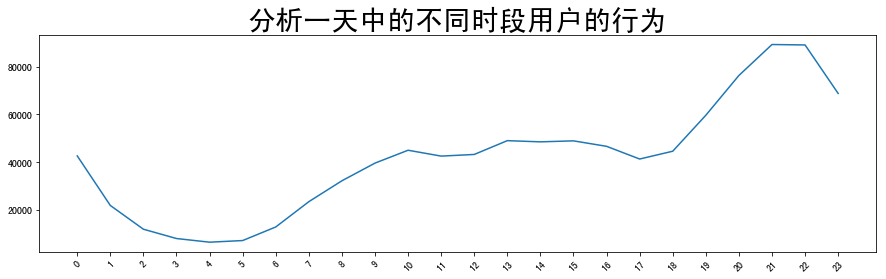

In [29]:
fig=plt.figure(figsize=(15,4))
plt.title('分析一天中的不同时段用户的行为',fontsize=28)
plt.xticks(np.arange(24),rotation=45)
ax=fig.add_subplot(111)
ax.plot(df.index,df)

从图形中可以看到，从晚上10点到凌晨5点，用户数量逐渐降低，降为一天之中最少，因为此段时间大多数人处于休息之中。
从早上6点开始，用户行为数量逐渐增多，直至上午10点左右。10点-18：00用户行为数量一直保持一个平稳的状态，用户行为数量很稳定。18：00过后，很多人已经下班，有闲暇时间，用户行为数量逐渐增加，直至一天之中的最高值。如果运营人员采取活动，可以参考用户比较活跃的时间段。因此晚上18：00以后是淘宝用户访问app的活跃时间段。

大部分用户的主要活跃时间段为9：00-22：00，其中18：00-22：00开始逐渐增加，达到一天之中的顶峰。每周的主要活跃时间为周二至周四，运营人员可根据活跃时间进行相关的活动

No handles with labels found to put in legend.


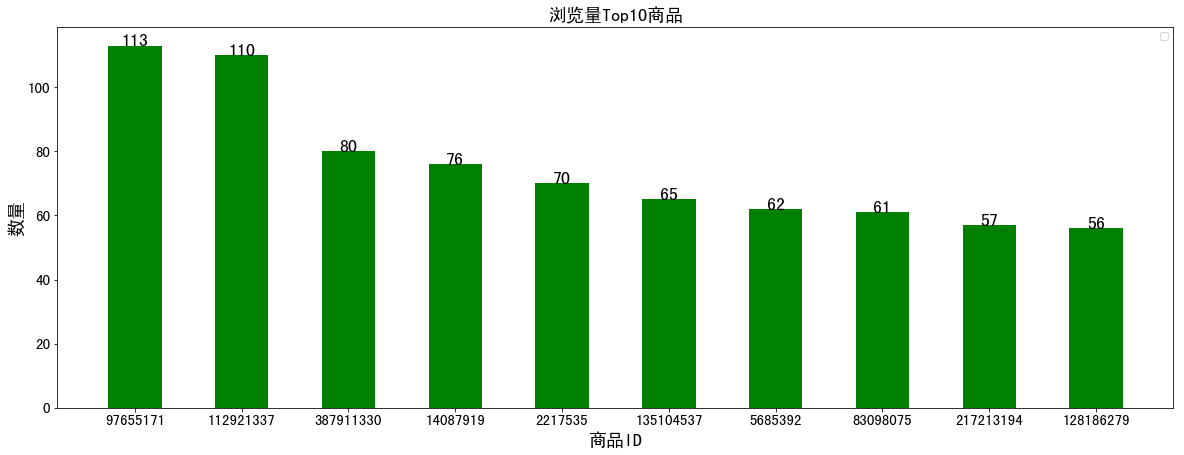

In [31]:
# https://blog.csdn.net/zengbowengood/article/details/104324293
plt.figure(figsize=(20,7))
product_top= data[data.behavior_type == 'pv']['item_id'].value_counts().head(10)
product_top
X=product_top.index
Y=product_top.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,horizontalalignment='center',fontsize=18)
plt.ylabel('数量',size='18')
plt.xlabel('商品ID',size='18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('浏览量Top10商品',fontsize=18)
plt.show()
# X

### 用户行为转换率分析

In [32]:
# 这里我们分析从观看浏览，到最后购买的占比
pv_count=data[data['behavior_type']=='pv']['user_id'].count()
buy_count=data[data['behavior_type']=='buy']['user_id'].count()
pv_to_buy=buy_count/pv_count
pv_to_buy

0.010370960038210477

In [33]:
pv_num=data[data['behavior_type']=='pv']['user_id'].count()
collect_num=data[data['behavior_type']=='collect']['user_id'].count()
cart_num=data[data['behavior_type']=='cart']['user_id'].count()
buy_num=data[data['behavior_type']=='buy']['user_id'].count()

middle_num=collect_num+cart_num
data1={'用户行为':['pv','middle','buy'],
      '人数':[pv_num,middle_num,buy_num]}
result=pd.DataFrame(data1)
result

,用户行为,人数
0,pv,942150
1,middle,48079
2,buy,9771


In [ ]:
# 单一环节转化率：
# 1、48079，942150
# 2、9771，48079
# 48079，9771  
# 942150 48079

In [34]:
#计算单环节转化率
temp1=np.array(result['人数'][1:])
temp2=np.array(result['人数'][0:-1])
temp1,temp2
single_link=temp1/temp2
single_link=list(single_link)
single_link
single_link.insert(0,1)
single_link
single_link=[round(x,4) for x in single_link]
result['单一环节转化率']=single_link
result

,用户行为,人数,单一环节转化率
0,pv,942150,1.0000
1,middle,48079,0.0510
2,buy,9771,0.2032


In [35]:
#求总体转化率
temp3=np.array(result['人数'])
temp4=np.ones(len(result['人数']))*result['人数'][0]
temp3,temp4
total_links=list(temp3/temp4)
total_links
total_links=[round(x,4) for x in total_links]
result['总体转化率']=total_links
result

,用户行为,人数,单一环节转化率,总体转化率
0,pv,942150,1.0000,1.0000
1,middle,48079,0.0510,0.0510
2,buy,9771,0.2032,0.0104


分析结论：用户点击后，收藏或者加购物车的概率在5%左右，而最后真正的购买率在1%，已经收藏或者加购物车到最终购买的转化率为20.32%，购买转化率很低，后面可以采取活动提高购买转化率。